In [89]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [91]:
import pandas as pd
df = pd.read_csv("C:/Users/Admin/Downloads/APY.csv")
new_df = df[df.iloc[:,0]=='Karnataka']
new_df = new_df.applymap(lambda x: x.strip() if type(x)==str else float(str(x).strip()))
new_df.columns = [i.strip() for i in new_df.columns]

In [112]:
new_df.columns

Index(['State', 'District', 'Crop', 'Crop_Year', 'Season', 'Area',
       'Production', 'Yield'],
      dtype='object')

In [92]:
Q1 = new_df.Yield.quantile(0.25)
Q3 = new_df.Yield.quantile(0.75)
IQR = Q3 - Q1
low = Q1 - 1.5*IQR                                          
high = Q3 + 1.5*IQR
low, high

(-3.35, 6.8100000000000005)

In [93]:
out_df = new_df[(new_df.Yield<high)]

In [94]:
districts = pd.get_dummies(out_df.District)
crops = pd.get_dummies(out_df.Crop)
seasons = pd.get_dummies(out_df.Season)
X = out_df[['Crop_Year','Area']]
X = pd.concat([X,districts,crops,seasons],axis=1)
Y = out_df['Yield']

(array([2233., 4623., 3633., 2496., 1873.,  990.,  783.,  699.,  926.,
         583.,  592.,  616.,  444.,  627.,  481.,  343.,  175.,  133.,
         102.,  123.,  117.,   84.,  200.,   74.,  114.,   83.,  125.,
         169.,  135.,  130.]),
 array([0.   , 0.227, 0.454, 0.681, 0.908, 1.135, 1.362, 1.589, 1.816,
        2.043, 2.27 , 2.497, 2.724, 2.951, 3.178, 3.405, 3.632, 3.859,
        4.086, 4.313, 4.54 , 4.767, 4.994, 5.221, 5.448, 5.675, 5.902,
        6.129, 6.356, 6.583, 6.81 ]),
 <BarContainer object of 30 artists>)

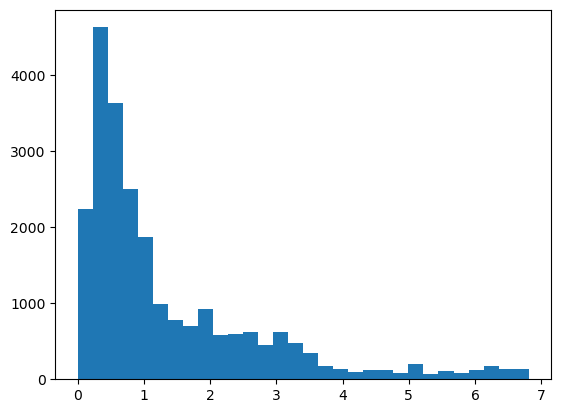

In [95]:
plt.hist(Y,bins=30)

In [96]:
x,y = map(lambda i: i.to_numpy(), [X,Y])
x_vals,x_cats = x[:,:2],x[:,2:]
scaler = StandardScaler()
scaled_x_vals = scaler.fit_transform(x_vals)
scaled_x = np.concatenate([scaled_x_vals,x_cats], axis=1)

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 42, test_size = 0.25)
scaled_x_train, scaled_x_test, y_train, y_test = train_test_split(scaled_x,y,random_state = 42, test_size = 0.25)

In [98]:
tf_x_train, tf_x_test, tf_y_train, tf_y_test = map(lambda i: tf.constant(i, dtype=tf.float32), [x_train, x_test, y_train, y_test])
tf_scaled_x_train, tf_scaled_x_test, tf_y_train, tf_y_test = map(lambda i: tf.constant(i, dtype=tf.float32), [scaled_x_train, scaled_x_test, y_train, y_test])

In [99]:
input_shape = (tf_scaled_x_train.shape[1],)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=input_shape))
model.add(tf.keras.layers.Dense(40, activation='relu'))
model.add(tf.keras.layers.Dense(40, activation='relu'))
model.add(tf.keras.layers.Dense(40, activation='relu'))
model.add(tf.keras.layers.Dense(40, activation='relu'))
model.add(tf.keras.layers.Dense(40, activation='relu'))

model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adagrad', loss='mean_squared_error', metrics=['mean_squared_error'])

model.fit(tf_scaled_x_train, tf_y_train, epochs=50, batch_size=16)

Epoch 1/50
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 1s 506us/step - loss: 2.3706 - mean_squared_error: 2.3706
Epoch 2/50
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 1s 501us/step - loss: 1.5690 - mean_squared_error: 1.5690
Epoch 3/50
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 1s 505us/step - loss: 1.3464 - mean_squared_error: 1.3464
Epoch 4/50
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 1s 503us/step - loss: 1.1458 - mean_squared_error: 1.1458
Epoch 5/50
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 1s 524us/step - loss: 1.0425 - mean_squared_error: 1.0425
Epoch 6/50
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 1s 511us/step - loss: 0.8856 - mean_squared_error: 0.8856
Epoch 7/50
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 1s 524us/step - loss: 0.8060 - mean_squared_error: 0.8060
Epoch 8/50
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 1s 490us/step - loss: 0.7513 - mean_squared_error: 0.7513
Epoch 9/50
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 1s 527us/step - loss: 0.7144 - mean_squared_error: 0.7144
Epoch 10/50
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 1s 509us/step - loss: 0.6443 - mean_squared_error: 0.6443

In [100]:
y_pred = model.predict(tf_scaled_x_test)
mae = mean_absolute_error(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)
rmse = mse**0.5
mae, mse, rmse

186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step


(0.38809307898018114, 0.3804770349966911, 0.616828205415974)

In [51]:
np.mean(y_test), np.std(y_test)

(1.3366796018221698, 1.3903722225554922)

In [115]:
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [119]:
graph_df = pd.concat([X,Y])

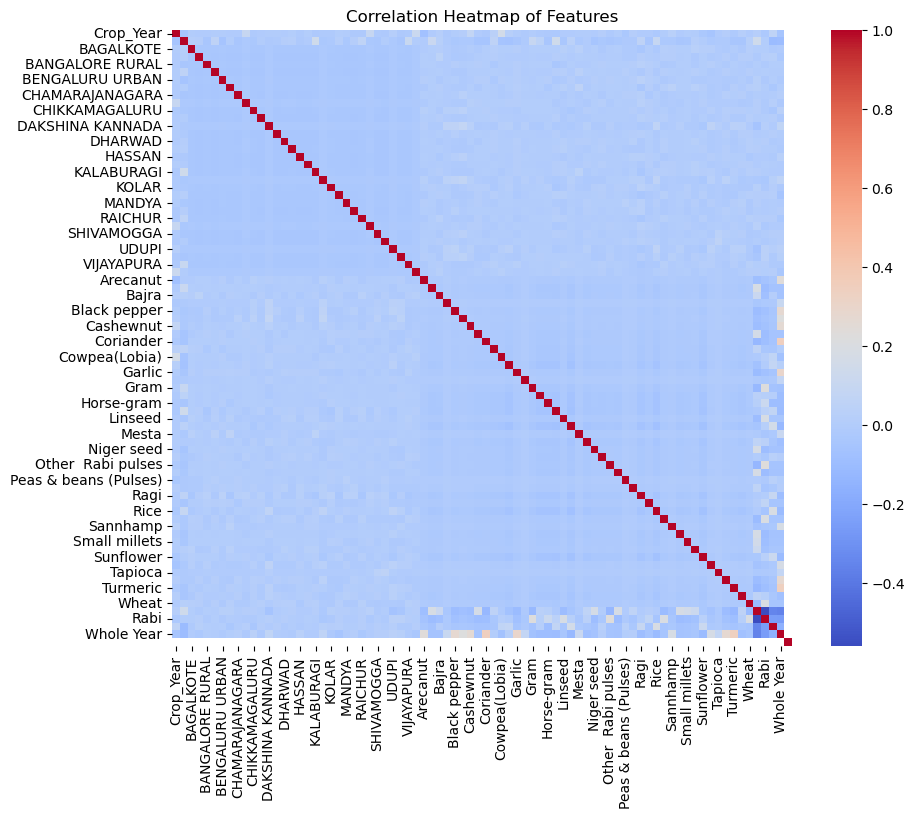

In [122]:
plt.figure(figsize=(10, 8))
sns.heatmap(graph_df.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()